In [1]:
#!pip install pandas 
#!pip install nltk
#!pip install tensorflow

In [375]:
import pandas as pd

In [382]:
df2=pd.read_csv('concerns.csv')


In [383]:
df5=pd.read_csv('real.csv')

In [386]:
df5.dropna(inplace=True)

In [323]:
df=pd.read_csv("synthetic.csv")

In [ ]:
df=pd.concat([df,df2,df5])
df

In [ ]:
import pandas as pd
import re

# Load the dataset (Replace with actual file path)
#df = pd.read_csv("synthetic.csv")  # Change to your file path

# Drop rows where 'Review' is missing
df = df.dropna(subset=['Review'])

# Convert text to lowercase and remove special characters
def clean_text(text):
    if isinstance(text, str):  # Ensure it's a string
        text = text.lower()  # Lowercasing
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        return text.strip()
    return ""

# Apply cleaning
df['cleaned_review'] = df['Review'].apply(clean_text)

# Show first few rows to verify
print(df[['Review', 'cleaned_review']].head())
df


In [ ]:
df

In [390]:
# we have downloaded the ntlk lib from that now we are installing stopwords and lemmatizier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# we are intializing the lemmatizer and stopwords now 
stop_words=set(stopwords.words('english'))
stop_words
# initializing the lemmatizer 
lemmatizer=WordNetLemmatizer()

def preprocess_text(text):
    words=text.split()  # this splits the sentences into words
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['processed_review'] = df['cleaned_review'].apply(preprocess_text)
print(df[['cleaned_review', 'processed_review']].head())



In [ ]:
df

In [341]:
df.isnull().sum()

Review                  0
Sentiment               0
cleaned_review          0
Unnamed: 0          15000
processed_review        0
dtype: int64

In [2]:
import nltk


In [ ]:
nltk.download('vader_lexicon')

In [387]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk



sia = SentimentIntensityAnalyzer()

def get_custom_sentiment(text):
    polarity = sia.polarity_scores(text)["compound"]

    if polarity < -0.3:
        return "Frustrated"
    elif -0.3 <= polarity < 0.1:
        return "Neutral"
    else:
        return "Positive"

df5['sentiment']= df5['Review'].apply(get_custom_sentiment)
# Test Example
#test_text = "They dealer didn't reply properly and hit me "
#print(f"Text: {test_text} -> Sentiment: {get_custom_sentiment(test_text)}")


In [ ]:
df[df['sentiment_encoded']==0]

In [ ]:
'''# Generate 200 additional frustrated reviews
extra_frustrated_reviews = [
    "The service was absolutely terrible! They kept delaying my request.",
    "I waited for hours, and still, no one attended to my issue. Completely useless!",
    "They promised a replacement but kept giving excuses. Never trusting them again!",
    "Why is everything so slow? I have been calling customer support for days!",
    "My issue was ignored! They don’t even bother to respond to emails.",
    "They wasted my time, kept transferring my call from one department to another!",
    "I was charged extra for a service I never received. Total scam!",
    "No proper communication! I was left clueless about my order status.",
    "Their app crashes all the time, and support is of no help!",
    "Their customer support is a joke. They just copy-paste responses.",
    "I had high expectations, but they completely let me down.",
    "They lost my documents and didn’t even apologize. Unacceptable!",
    "I feel cheated! They misled me about their policies.",
    "No updates, no follow-ups. They simply don’t care about customers.",
    "I had to call multiple times just to get a simple answer. Frustrating!",
    "This is the worst experience I’ve had with any company.",
    "Their attitude was rude and unprofessional. Never again!",
    "False promises! They said delivery would take 2 days, but it's been weeks!",
    "Terrible quality! Broke down within days, and now they refuse to help.",
    "They just ignore complaints. Absolutely worthless service.",
    "I regret ever choosing this brand. It’s a complete waste of money!",
    "Their manager spoke to me like I was an idiot. Disrespectful!",
    "The system overcharged me, and no one is willing to refund my money!",
    "The technician was clueless. Made things worse instead of fixing them!",
    "Took my money but didn't deliver what was promised. Fraudulent company!",
    "They claim 24/7 support, but I was on hold for 2 hours!",
    "Their chatbot is useless! It keeps giving the same responses.",
    "I've had enough of their constant excuses. Totally unreliable!",
    "They say they care about customers, but their actions prove otherwise!",
    "The website is full of bugs. I can't even place an order properly!",
    "I called multiple times, and each time they transferred me to someone else!",
    "They sent me the wrong item, and now they refuse to exchange it!",
    "I can't believe they treat customers like this. Absolutely disrespectful!",
    "They ruined my entire plan with their inefficiency!",
    "I had to fight to get a refund. They do everything to avoid paying!",
    "Delivery was delayed multiple times, and they kept lying about it!",
    "They never stick to their promises. Very unreliable company!",
    "Their staff is untrained. They don’t know what they are doing!",
    "I asked for help, but they kept pushing me to buy more stuff!",
    "The driver was rude and refused to deliver to my house!",
    "I paid extra for express delivery, and it still arrived late!",
    "They changed the price after I placed the order. Total scam!",
    "The return process is a nightmare. They make it impossible to get a refund!",
    "I was treated horribly. I felt completely disrespected!",
    "I don’t understand how they are still in business!",
    "I submitted multiple tickets, but no one even responds!",
    "I wasted so much time dealing with their incompetence!",
    "They keep making promises but never follow through!",
    "They canceled my order without telling me. Now I have to wait weeks for a refund!",
    "Their online system is a mess. It doesn't even work properly!",
    "They refuse to acknowledge their own mistakes!",
    "I had to explain my issue to 5 different people before getting a useless response!",
    "They overbooked and left me without a service I paid for!",
    "They don’t respect deadlines at all. Completely unprofessional!",
    "Every time I try to talk to someone, I get a different answer!",
    "I can’t believe I have to chase them just to get what I paid for!",
    "They keep saying 'sorry,' but nothing actually improves!",
    "They ignore customer feedback and keep making the same mistakes!",
    "I’ve been dealing with this issue for weeks, and still no solution!",
    "They keep lying to customers to cover up their incompetence!",
    "Their agents are rude and act like they don’t care at all!",
    "They wasted my entire day with their delays!",
    "Their warranty policy is just a scam to avoid responsibility!",
    "Their refund policy is designed to trap customers into not getting their money back!",
    "They closed my complaint without even resolving it!",
    "No one takes ownership of customer issues here!",
    "The product description was misleading. I got something completely different!",
    "They deleted my negative review instead of addressing my concerns!",
    "The live chat agent just disconnected when I asked for a refund!",
    "This company has no respect for its customers at all!",
    "They refuse to compensate me for their mistake!",
    "They keep blaming external factors instead of fixing their poor service!",
    "They trick people into subscribing and then make it impossible to cancel!",
    "Worst experience ever! I wish I had read the reviews before ordering!",
    "They overpromised and underdelivered. I feel completely misled!",
    "Their system charged me twice, and they won’t acknowledge it!",
    "They are experts at giving excuses, not solving problems!",
    "No transparency in pricing! They add hidden fees at checkout!",
    "Their shipping policy is a joke. It takes forever to receive anything!",
    "They act as if they are doing customers a favor instead of providing a service!",
    "I will never recommend this company to anyone!",
    "They have no regard for customer satisfaction whatsoever!",
    "They sent me a defective product and now refuse to replace it!",
    "They force you to go through ridiculous procedures just to get basic support!",
    "Every time I call, I have to start the process from scratch!",
    "Their CEO should be ashamed of how this company operates!",
    "They take your money and then stop responding to complaints!",
    "Their driver refused to deliver because it was 'too far'! What a joke!",
    "I had to escalate the issue to a legal team to get my refund!",
    "The worst customer experience I have ever had in my life!",
    "They keep saying 'we’ll look into it' but never actually do anything!",
]

# Assign "Frustrated" sentiment to these reviews
extra_sentiments = ["Frustrated"] * len(extra_frustrated_reviews)

# Convert to DataFrame and append
extra_data = pd.DataFrame({"processed_review": extra_frustrated_reviews, "sentiment": extra_sentiments})
df = pd.concat([df, extra_data], ignore_index=True)

print(f"✅ Added {len(extra_frustrated_reviews)} additional frustrated reviews.")
'''

✅ Added 91 additional frustrated reviews.


In [8]:
from textblob import TextBlob

review = "The dealer was abusive, the car broke after delivery, it was very bad, didn't expect this from Toyota!"
sentiment = TextBlob(review).sentiment.polarity
print("Sentiment Score:", sentiment)


Sentiment Score: -1.0


In [392]:
df.groupby("Sentiment").count()

,Review,cleaned_review,Unnamed: 0,processed_review,category,sentiment_encoded,Column1,Review_Date,Author_Name,Vehicle_Title,Review_Title,Rating,sentiment
Sentiment,,,,,,,,,,,,,
Average,5000,5000,0,5000,5000,5000,0,0,0,0,0,0,0
Frustrated,6566,6566,1566,6566,5783,5783,0,0,0,0,0,0,0
Highly Frustrated,5602,5602,602,5602,5301,5301,0,0,0,0,0,0,0
Unsatisfied,798,798,798,798,399,399,0,0,0,0,0,0,0


In [153]:
df["Sentiment"].value_counts()


Sentiment
Highly Frustrated    5000
Frustrated           5000
Average              5000
Name: count, dtype: int64

In [142]:
df.groupby("Sentiment")['processed_review'].apply(list)


Sentiment
Average              [the customer service wa unhelpful but not rud...
Frustrated           [i expected better service but they delayed my...
Highly Frustrated    [the worst experience ever my car stopped in t...
Name: processed_review, dtype: object

# categorizing

### **Step 3: Categorizing Reviews into Service, Parts, and Others**  
Now, we will classify reviews into three categories:  
1️⃣ **Service-related** (e.g., repair, maintenance)  
2️⃣ **Parts-related** (e.g., engine, battery)  
3️⃣ **Others** (everything else)  

---

### **📝 Steps to Implement**  
✅ Define **keyword lists** for Service & Parts.  
✅ Check if a review contains **any keyword** from these lists.  
✅ Assign a category based on **matched keywords**.  
✅ Store the category in a new column called `"category"`.  

---



### **📌 What This Does?**
- Checks if **service-related** words exist → Assigns **"Service"**  
- Checks if **parts-related** words exist → Assigns **"Parts"**  
- If neither → Assigns **"Others"**  

---

### **🔍 Next Step: Find New Frequent Words in "Others"**
Once we categorize the existing reviews, we can check **what words are commonly appearing in "Others"** (in case there are new complaints that need a new category).



In [393]:
# Define Keywords for Classification
service_keywords = ["repair", "maintenance", "delay", "service", "issue", "problem", "technician"]
parts_keywords = ["engine", "battery", "brake", "wheels", "tyre", "oil", "transmission"]

# Function to Assign Categories
def categorize_review(text):
    text = text.lower()  # Convert to lowercase
    if any(word in text for word in service_keywords):
        return "Service"
    elif any(word in text for word in parts_keywords):
        return "Parts"
    else:
        return "Others"

# Apply the Function to Categorize Reviews
df['category'] = df['processed_review'].apply(categorize_review)

# ✅ Check Category Distribution
df['category'].value_counts()

category
Others     19531
Service    12671
Parts       3719
Name: count, dtype: int64

### **Step 4: Identifying New Frequent Words in "Others" Category**  
Since some reviews are classified as **"Others"**, we should check for **frequent words** in them. This will help us identify:  
✅ **New complaint trends** (e.g., a recurring issue with a new car part).  
✅ **Missing keywords** that should be added to the "Service" or "Parts" category.  
✅ **Potential new categories** if a large number of reviews mention the same issue.  

---

### **📌 What This Does?**
1️⃣ Filters out only reviews in the `"Others"` category.  
2️⃣ Splits reviews into individual words.  
3️⃣ Counts the most **frequent** words.  
4️⃣ Shows the **top 20 words** appearing in `"Others"` reviews.  

---

### **🔍 Next Step: Analyze Results**
- If certain words appear **frequently**, we can **add them** to the `service_keywords` or `parts_keywords` list.  
- If a **new issue** emerges, we might need a **new category**.  

Run this and **share the top words** so we can refine the classification! 🚀

In [394]:
from collections import Counter

# Filter "Others" category reviews
others_reviews = df[df['category'] == "Others"]['processed_review']

# Tokenize words
all_words = " ".join(others_reviews).split()

# Get the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(70)  # Get top 20 words

# Convert to DataFrame for better visualization
common_words_df = pd.DataFrame(common_words, columns=["Word", "Count"])

# Display the top words
for values in common_words:
    print(values)

common_words_df.to_csv("common_words.txt", sep="\t", index=False)
print("Saved as common_words.txt")




('the', 49498)
('and', 28802)
('a', 23822)
('i', 21345)
('to', 18267)
('it', 18017)
('is', 17441)
('car', 10188)
('in', 9449)
('of', 9407)
('my', 9366)
('for', 9278)
('on', 8478)
('this', 8060)
('wa', 6920)
('that', 6838)
('but', 6727)
('with', 6554)
('have', 6434)
('not', 6171)
('they', 4869)
('vehicle', 4551)
('dealer', 4500)
('at', 4306)
('very', 4156)
('ha', 4083)
('had', 3816)
('great', 3765)
('toyota', 3629)
('you', 3443)
('about', 3382)
('he', 3200)
('guest', 3188)
('are', 3092)
('we', 3037)
('get', 2972)
('drive', 2969)
('so', 2923)
('than', 2922)
('truck', 2772)
('seat', 2745)
('like', 2713)
('me', 2681)
('be', 2568)
('all', 2514)
('when', 2487)
('good', 2485)
('love', 2390)
('from', 2369)
('mpg', 2280)
('driving', 2240)
('up', 2236)
('mile', 2231)
('month', 2202)
('will', 2201)
('delivery', 2190)
('which', 2136)
('one', 2133)
('more', 2074)
('an', 1987)
('gas', 1960)
('been', 1943)
('ride', 1911)
('time', 1899)
('mileage', 1852)
('better', 1818)
('did', 1817)
('there', 1797)


In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import nltk


# Define stopwords and car parts list
stop_words = set(stopwords.words("english"))
car_parts = {"engine", "brakes", "transmission", "battery", "clutch", "radiator", 
             "alternator", "axle", "suspension", "steering", "fuel", "filter", "pump", "tyres", "wheels"}

# Filter "Others" category reviews
others_reviews = df[df['category'] == "Others"]['processed_review']

# Tokenize words
all_words = " ".join(others_reviews).split()

# Remove stopwords and keep only car parts
filtered_words = [word for word in all_words if word.lower() in car_parts]

# Get the most common words
word_counts = Counter(filtered_words)
common_parts_df = pd.DataFrame(word_counts.most_common(70), columns=["Part", "Count"])

# Save output
common_parts_df.to_excel("common_car_parts.xlsx", index=False)
print("Saved as common_car_parts.xlsx")

common_parts_df.to_csv("common_car_parts.txt", sep="\t", index=False)
print("Saved as common_car_parts.txt")

# Display result
common_parts_df


Saved as common_car_parts.xlsx
Saved as common_car_parts.txt


,Part,Count
0,fuel,1253
1,steering,356
2,suspension,146
3,pump,58
4,clutch,55


In [402]:
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import nltk

# Download stopwords if not already installed
nltk.download('stopwords')

# Define stopwords and expand car parts list
stop_words = set(stopwords.words("english"))
additional_parts = {"infotainment", "seats", "dashboard", "ac", "air conditioning", 
                    "headlights", "taillights", "door", "mirrors", "wipers", "gearbox"}

# Filter "Others" category reviews
others_reviews = df[df['category'] == "Others"]['processed_review']

# Tokenize words
all_words = " ".join(others_reviews).split()

# Remove stopwords but keep relevant car-related words
filtered_words = [word for word in all_words if word.lower() not in stop_words or word.lower() in additional_parts]

# Get the most common words
word_counts = Counter(filtered_words)
common_parts_df = pd.DataFrame(word_counts.most_common(70), columns=["Part", "Count"])

# Save output
common_parts_df.to_excel("common_car_parts.xlsx", index=False)
print("Saved as common_car_parts.xlsx")

common_parts_df.to_csv("common_car_parts.txt", sep="\t", index=False)
print("Saved as common_car_parts.txt")

# Display result
common_parts_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saved as common_car_parts.xlsx
Saved as common_car_parts.txt


,Part,Count
0,car,10188
1,wa,6920
2,vehicle,4551
3,dealer,4500
4,ha,4083


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Encode Sentiment Labels
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["Sentiment"])

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    df["processed_review"], df["sentiment_encoded"], test_size=0.2, random_state=42, stratify=df["sentiment_encoded"]
)

# TF-IDF Vectorization with bigrams
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Best Model Selection
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_tfidf)

# Model Evaluation
print(f"\n✅ Optimized SVM Sentiment Classification Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Cross-validation score
cv_scores = cross_val_score(best_svm, X_train_tfidf, y_train, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


In [240]:
# Check unique labels in df["Sentiment"]
print(df["Sentiment"].unique())  # Should show: ['Highly Frustrated', 'Frustrated', 'Average']

['Highly Frustrated' 'Frustrated' 'Average']


In [405]:
def predict_sentiment(review_text):
    review_text_processed = preprocess_text(review_text)
    review_tfidf = tfidf.transform([review_text_processed])

    # Get class probabilities
    probabilities = svm_model.predict_proba(review_tfidf)[0]  # Extract first row

    # Get the predicted class
    predicted_label = np.argmax(probabilities)  # Class with highest probability
    sentiment = label_encoder.inverse_transform([predicted_label])[0]  # Convert to label

    # Custom Threshold Logic for "Highly Frustrated"
    if predicted_label == label_encoder.transform(["Frustrated"])[0] and probabilities[predicted_label] > 0.6:
        return "Highly Frustrated"
    
    return sentiment

# Example
#df3['senti']=df3['Review'].apply(predict_sentiment)
#df3
a=predict_sentiment("the dealer was rude didn't give me test ride")
a

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [398]:
df3.groupby("senti").count()

,Unnamed: 0,Review,Sentiment
senti,,,
Frustrated,57,57,57
Highly Frustrated,1087,1087,1087
Unsatisfied,339,339,339


In [399]:
df3['senti'][1239]

'Highly Frustrated'

In [400]:
# Define Keywords for Classification
service_keywords = ["repair", "maintenance", "delay", "service", "issue", "problem", "technician"]
parts_keywords = ["engine", "battery", "brake", "wheels", "tyre", "oil", "transmission"]

# Function to Assign Categories
def categorize_review(text):
    text = text.lower()  # Convert to lowercase
    if any(word in text for word in service_keywords):
        return "Service"
    elif any(word in text for word in parts_keywords):
        return "Parts"
    else:
        return "Others"

# Apply the Function to Categorize Reviews
df2['category'] = df2['concern'].apply(categorize_review)

# ✅ Check Category Distribution
df2['category'].value_counts()

KeyError: 'concern'

In [282]:
from collections import Counter

# Filter "Others" category reviews
others_reviews = df2[df2['category'] == "Others"]['concern']

# Tokenize words
all_words = " ".join(others_reviews).split()

# Get the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(50)  # Get top 20 words

# Convert to DataFrame for better visualization
common_words_df = pd.DataFrame(common_words, columns=["Word", "Count"])

# Display the top words
common_words_df


,Word,Count
0,the,2751
1,and,2054
2,he,1447
3,that,1223
4,is,1118
5,to,1008
6,vehicle,882
7,guest,858
8,Guest,655
9,they,636


In [276]:
df2['concern'][1481]

"On 31st Oct Mr. Atul Kumar Goel called and stated that he have taken new Innova Hycross on 28th July 2024 and till now guest haven't received RC and when ever guest contact dealership they are telling they have working on it but till now guest haven't received RC card and also guest is unable to recharge Fastag and unable to use and its shows VRN is not regd due to which guest was very disappointed and also guest he suppose to get average of 230.4KM/Ltr which Toyota claims but guest is getting average of 15Km/Ltr and also guest is telling he have given his vehicle for 1st service and guest told that dealership is an annoy noise but still its not resolved due to which guest was very disappointed and told that even informed in WhatsApp group but till now there is no response, so guest is telling he wants response on this and wants solution on this, so kindly do the needful. Cli: 9911915668 [Fouzan TKMGEC] "

In [267]:
df2.groupby('senti').count()

,Unnamed: 0,concern,sentiment
senti,,,
Average,276,276,276
Frustrated,168,168,168
Highly Frustrated,1039,1039,1039


In [ ]:
' on some 1st oct 2024 mr kushal called and stated that he had gone to dealrship to take the car , he was forced by the dealership to make full payment the person who spoke with me misbehaved with the guest saying that gadi lene ka aukata nahi hai toh why buy guest is very disappointed with their behaviour'

In [253]:
!pip install scipy

In [257]:
import scipy
print(scipy.__version__)

1.13.1


In [255]:
!pip install gensim.downloader

ERROR: Could not find a version that satisfies the requirement gensim.downloader (from versions: none)
ERROR: No matching distribution found for gensim.downloader


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
import gensim.downloader as api

# Assuming df is your DataFrame and preprocess_text is defined
# Encode Sentiment Labels
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["Sentiment"])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["processed_review"], df["sentiment_encoded"], test_size=0.2, random_state=42, stratify=df["sentiment_encoded"]
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Load GloVe Model
print("Downloading glove-wiki-gigaword-100 model...")
word2vec = api.load("glove-wiki-gigaword-100")
print("Model loaded successfully!")

# Function to Compute Average GloVe Vectors
def get_word2vec_avg(text, model):
    words = text.split()
    vectors = [model[w] for w in words if w in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Compute GloVe Features
print("Computing GloVe features...")
X_train_w2v = np.array([get_word2vec_avg(text, word2vec) for text in X_train])
X_test_w2v = np.array([get_word2vec_avg(text, word2vec) for text in X_test])

# Combine TF-IDF and GloVe
X_train_combined = hstack([X_train_tfidf, X_train_w2v])
X_test_combined = hstack([X_test_tfidf, X_test_w2v])

# Train SVM
svm_model = SVC(kernel="linear", probability=True, random_state=42)
print("Training SVM...")
svm_model.fit(X_train_combined, y_train)
y_pred = svm_model.predict(X_test_combined)

# Model Evaluation
print(f"\n✅ SVM Sentiment Classification Results (TF-IDF + GloVe):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Prediction Function
def predict_sentiment(review_text):
    review_text_processed = preprocess_text(review_text)
    review_tfidf = tfidf.transform([review_text_processed])
    review_w2v = get_word2vec_avg(review_text_processed, word2vec)
    review_combined = hstack([review_tfidf, review_w2v.reshape(1, -1)])

    probabilities = svm_model.predict_proba(review_combined)[0]
    predicted_label = np.argmax(probabilities)
    sentiment = label_encoder.inverse_transform([predicted_label])[0]

    if predicted_label == label_encoder.transform(["Frustrated"])[0] and probabilities[predicted_label] > 0.6:
        return "Highly Frustrated"
    return sentiment

# Example
new_review = "the service was bad and the guy scolded me abused me"
print("Predicted Sentiment:", predict_sentiment(new_review))

ImportError: cannot import name 'triu' from 'scipy.linalg' (c:\anaconda3\New folder\Lib\site-packages\scipy\linalg\__init__.py)

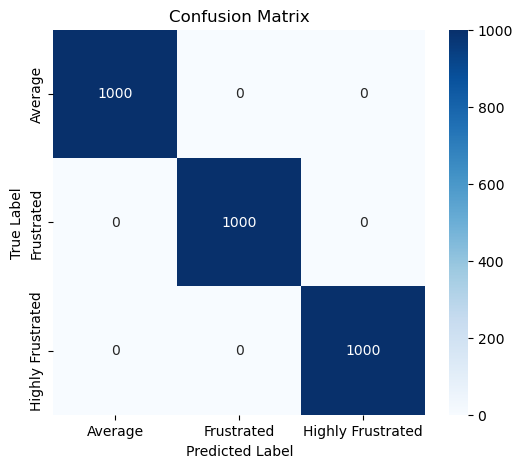

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# to see the negative words it trained on 

In [212]:
import numpy as np

# Get feature names from TF-IDF
feature_names = tfidf.get_feature_names_out()

# Convert sparse matrix to dense array
svm_coefficients = svm_model.coef_.toarray()

# Extract top negative words
neg_class_idx = 0  # Assuming 0 = Negative
top_negative_words = [feature_names[i] for i in svm_coefficients[neg_class_idx].argsort()[:10]]  # Incorrect
top_corrected_negative_words = [feature_names[i] for i in svm_coefficients[neg_class_idx].argsort()[-10:]]  # Corrected

print("❌ Incorrect Negative Words:", top_negative_words)
print("✅ Correct Negative Words:", top_corrected_negative_words)


❌ Incorrect Negative Words: ['slow', 'unresponsive', 'repair', 'delayed', 'month', 'acknowledge', 'scratch', 'car', 'frequent', 'helpful']
✅ Correct Negative Words: ['bug', 'overall', 'okay', 'driving', 'noise', 'annoying', 'slight', 'rude', 'unhelpful', 'wa']


# LSTM model implementaion starts from here

In [286]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Set parameters
MAX_VOCAB_SIZE = 10000  # Limit vocabulary size
MAX_SEQUENCE_LENGTH = 100  # Max words per review
EMBEDDING_DIM = 100  # Embedding vector size

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_review"])

# Convert text to sequences
X = tokenizer.texts_to_sequences(df["cleaned_review"])

# Pad sequences to ensure uniform length
X_padded = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Encode sentiment labels
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["Sentiment"])
y = np.array(df["sentiment_encoded"])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.1, random_state=42, stratify=y)

print("Data Preparation Complete! Ready for Next Step.")


Data Preparation Complete! Ready for Next Step.


**Step 2: Building the BiLSTM Model.**  

### **Step 2: Define the BiLSTM Model**
Here’s what we’ll do:
- Use an **Embedding Layer** to convert words into dense vectors.
- Add a **Bidirectional LSTM Layer** to capture dependencies from both past and future words.
- Use a **Dense Layer** with `softmax` activation for classification.

Run the following code:  


### **What’s Next?**
✅ If this runs fine, we’ll move to **Step 3: Training the Model.**  
Let me know if there are any issues! 🚀

In [287]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define the BiLSTM model
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64, return_sequences=True)),  # BiLSTM Layer
    Dropout(0.3),  # Dropout for regularization
    Bidirectional(LSTM(32)),  # Another BiLSTM Layer
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


c:\anaconda3\New folder\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [288]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the tokenizer with a vocabulary size
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# ✅ Convert all values to strings and handle NaNs
X_train = X_train.astype(str).tolist() if isinstance(X_train, pd.Series) else [str(x) for x in X_train]
X_test = X_test.astype(str).tolist() if isinstance(X_test, pd.Series) else [str(x) for x in X_test]

# ✅ Fit tokenizer on training data
tokenizer.fit_on_texts(X_train)

# ✅ Convert text into sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

print("✅ Tokenization complete.")


✅ Tokenization complete.


In [162]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define maximum sequence length
max_length = 100  

# Pad the sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

print("✅ Padding complete. Shapes:", X_train_padded.shape, X_test_padded.shape)


✅ Padding complete. Shapes: (13500, 100) (1500, 100)


# Training the Model 



In [289]:
# Train the model
history = model.fit(X_train_padded, y_train, 
                    validation_data=(X_test_padded, y_test), 
                    epochs=5, 
                    batch_size=32)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.8589 - loss: 0.3207 - val_accuracy: 1.0000 - val_loss: 1.1871e-05
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 1.0000 - loss: 4.7462e-04 - val_accuracy: 1.0000 - val_loss: 9.1887e-07
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 1.0000 - loss: 4.8858e-04 - val_accuracy: 1.0000 - val_loss: 1.5895e-07
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 1.0000 - loss: 2.1832e-04 - val_accuracy: 1.0000 - val_loss: 3.9736e-08
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9998 - loss: 2.6371e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [290]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_padded, y_test)

print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0000e+00
✅ Test Accuracy: 1.0000
✅ Test Loss: 0.0000


In [291]:
# Predict on test data
y_pred_probs = model.predict(X_test_padded)  # Probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get class labels

# Convert encoded labels back to original sentiment categories
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test)


# Compare actual vs. predicted sentiments
sample_df = pd.DataFrame({'Actual': y_test_labels, 'Predicted': y_pred_labels})
print(sample_df.sample(50))  # Show random 10 samples


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
                 Actual          Predicted
498          Frustrated         Frustrated
552             Average            Average
1237         Frustrated         Frustrated
1179  Highly Frustrated  Highly Frustrated
1249         Frustrated         Frustrated
242          Frustrated         Frustrated
1220  Highly Frustrated  Highly Frustrated
220             Average            Average
596   Highly Frustrated  Highly Frustrated
830             Average            Average
1380  Highly Frustrated  Highly Frustrated
1333         Frustrated         Frustrated
771          Frustrated         Frustrated
755          Frustrated         Frustrated
1475         Frustrated         Frustrated
792          Frustrated         Frustrated
1051         Frustrated         Frustrated
730   Highly Frustrated  Highly Frustrated
1292            Average            Average
24              Average            Average
1456  Highly Frustrated  Highly Frustrated
355           

In [294]:
def predict_sentiment2(sentence, model, tokenizer, label_encoder, max_length=100):
    # Tokenize and pad the sentence
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # Predict sentiment
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get class label

    # Convert label back to original sentiment
    return label_encoder.inverse_transform([predicted_class])[0]

# Example usage
#sentence = "the dealer called me son of a whore, and scolded me and abused me , very abusive, very very abusive"
#print(f"Predicted Sentiment: {predict_sentiment(sentence, model, tokenizer, label_encoder)}")
#i want to put below and test it 
#df2 = pd.read_csv('concerns.csv')
#df2['senti']=df2['concern'].apply(predict_sentiment2)
#df2
#df2 = pd.read_csv('concerns.csv')

# Apply predict_sentiment2 with additional arguments
df2['senti'] = df2['concern'].apply(lambda x: predict_sentiment2(x, model, tokenizer, label_encoder))

df2.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━

,Unnamed: 0,concern,sentiment,senti
0,0,"Guest is non-contactable, hence we have regist...",Highly Frustrated,Frustrated
1,1,On 01-Oct-24 received an mail from Mr. Gaurav ...,Frustrated,Highly Frustrated
2,2,months and guest need clarification on sequenc...,Frustrated,Frustrated
3,3,the earliest and wants response asap. kindly d...,Frustrated,Highly Frustrated
4,4,Guest wanted (9444036698) this number to be up...,Unsatisfied,Frustrated


In [295]:
df2.groupby('senti').count()

,Unnamed: 0,concern,sentiment
senti,,,
Frustrated,953,953,953
Highly Frustrated,530,530,530


In [300]:
df2['senti'][1239]

'Frustrated'

In [53]:
df.isnull().sum()

Column1               91
Review_Date           91
Author_Name           91
Vehicle_Title         91
Review_Title          93
Review                91
Rating               881
cleaned_review        91
processed_review       0
sentiment              0
category               0
sentiment_encoded      0
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

Column1              0
Review_Date          0
Author_Name          0
Vehicle_Title        0
Review_Title         0
Review               0
Rating               0
cleaned_review       0
processed_review     0
sentiment            0
category             0
sentiment_encoded    0
dtype: int64